# Cluster tweets into groups -> Topics Sentiment Analysis

In [2]:
import pandas as pd
import os
import numpy as np
import gensim as gensim
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
PROCESSED_DATASET = "./processed_dataset"
TRAIN_CHUNK = 50000
VAL_CHUNK = 10000

In [4]:
def cosine_function(x,y):
    c = np.dot(x,y)
    norm_a = np.linalg.norm(x)
    norm_b = np.linalg.norm(y)
    cosine_val = c/((norm_a)*(norm_b))
    return(cosine_val)

def cluster_summary(cosine_similarity,cluster_number):
    print('Summary Statistics of Cosine Similairty Distribution CLUSTER '+ str(cluster_number) +' --------->')
    print()
    print('Average Cosine similarity :', np.mean(cosine_similarity))
    print('Max Cosine Similarity :', max(cosine_similarity))
    print('Min Cosine Similarity :',min(cosine_similarity))
    print('Standard Deviation of the Cosine similarity Distribution :',np.std(cosine_similarity))

    x = np.arange(0,max(cosine_similarity), 0.02)
    y = cosine_similarity
    plt.hist(y,bins =x,histtype = 'barstacked',color = 'green')
    plt.xlabel('[Cosine Values]',color = 'blue')
    plt.ylabel('[Number of Tweets]',color = 'blue')
    plt.title('[Cosine Distribution for Cluster '+str(cluster_number)+']',color = 'blue')
    plt.show()

In [6]:
df_train = pd.read_csv(os.path.join(PROCESSED_DATASET, "train_set_labels.csv"), chunksize=TRAIN_CHUNK)
df_val = pd.read_csv(os.path.join(PROCESSED_DATASET, "val_set_labels.csv"), chunksize=VAL_CHUNK)
df_tr_chunks = [chunk for chunk in df_train]
df_val_chunks = [chunk for chunk in df_val]
df_tweets = pd.concat([df_tr_chunks[0], df_val_chunks[0]])

In [16]:
model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)
word_vectors = model.wv

df_positive = df_tweets[df_tweets["label"] == 1]
df_negative = df_tweets[df_tweets["label"] == 0]
print(len(df_negative))

pos_sent_dict = {}
neg_sent_dict = {}

# Generate positive tweets vector representation
for idx, tweet in enumerate(df_positive["Processed_text"]):
    if type(tweet) is str:
        list_vec = []
        sum_vec = np.zeros(300)
        for word in tweet.split(" "):
            if word in word_vectors.vocab:
                list_vec.append(model[word])

        if len(list_vec) > 0:
            # Average the list of word_vectors
            for vec in list_vec:
                sum_vec = sum_vec + vec
            sentence_vec = np.divide(sum_vec, len(list_vec))
            pos_sent_dict[f"{idx}"] = [sentence_vec, tweet]

# Generate negative tweets vector representation
for idx, tweet in enumerate(df_negative["Processed_text"]):
    if type(tweet) is str:
        list_vec = []
        for word in tweet.split(" "):
            if word in word_vectors.vocab:
                list_vec.append(model[word])
        if len(list_vec) > 0:
            # Average the list of word_vectors
            for vec in list_vec:
                sum_vec = sum_vec + vec
            sentence_vec = np.divide(sum_vec, len(list_vec))
            neg_sent_dict[f"{idx}"] = [sentence_vec, tweet]

/home/amit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


38369


## Positive Tweets Clustering


/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was

/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was

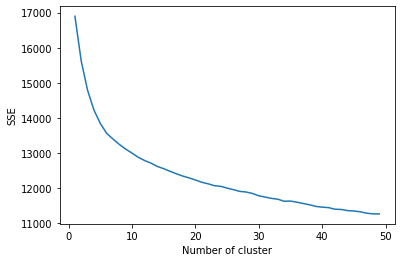

In [9]:
# Clustering Positive tweets

# Use Elbow method to get the number of clusters
# GAP statistics, computationally expensive, a good alternative

if (1):
    sse = {}
    X = [pos_sent_dict[key][0] for key in pos_sent_dict.keys()]
    for k in range(1, 50): 
        kmeans = cluster.KMeans(n_clusters=k, max_iter=300 , n_jobs = 6).fit(X)
        labels = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()

Summary Statistics of Cosine Similairty Distribution CLUSTER 1 --------->

Average Cosine similarity : 0.857861711433
Max Cosine Similarity : 0.959785075656
Min Cosine Similarity : 0.247634395779
Standard Deviation of the Cosine similarity Distribution : 0.0818031860026


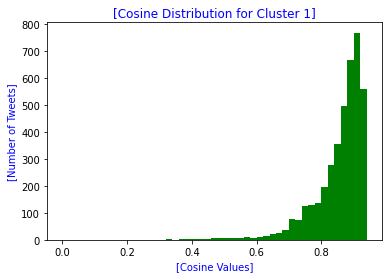

Summary Statistics of Cosine Similairty Distribution CLUSTER 2 --------->

Average Cosine similarity : 0.928639642877
Max Cosine Similarity : 0.994759696498
Min Cosine Similarity : 0.518939067363
Standard Deviation of the Cosine similarity Distribution : 0.0778785951907


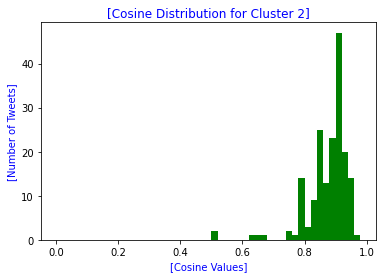

Summary Statistics of Cosine Similairty Distribution CLUSTER 3 --------->

Average Cosine similarity : 0.870396741434
Max Cosine Similarity : 0.974457887255
Min Cosine Similarity : 0.264085878318
Standard Deviation of the Cosine similarity Distribution : 0.0729968736244


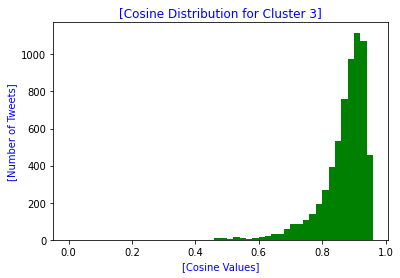

Summary Statistics of Cosine Similairty Distribution CLUSTER 4 --------->

Average Cosine similarity : 0.716028903077
Max Cosine Similarity : 0.92989778111
Min Cosine Similarity : 0.312188680918
Standard Deviation of the Cosine similarity Distribution : 0.125892807702


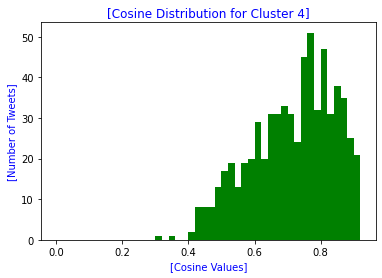

Summary Statistics of Cosine Similairty Distribution CLUSTER 5 --------->

Average Cosine similarity : 0.752413225623
Max Cosine Similarity : 0.942241696205
Min Cosine Similarity : 0.0923973320761
Standard Deviation of the Cosine similarity Distribution : 0.129854801115


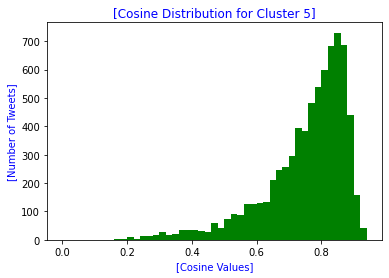

Summary Statistics of Cosine Similairty Distribution CLUSTER 6 --------->

Average Cosine similarity : 0.751314937708
Max Cosine Similarity : 0.950625152738
Min Cosine Similarity : 0.229050481647
Standard Deviation of the Cosine similarity Distribution : 0.128658338628


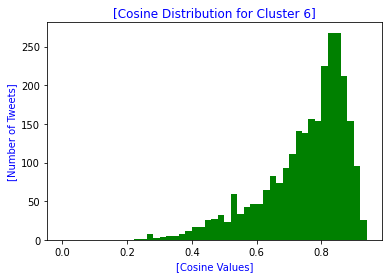

In [18]:
NUM_CLUSTERS = 6
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit([pos_sent_dict[key][0] for key in pos_sent_dict.keys()])
labels = kmeans.labels_

# group_dict -> {"0":{"id1": vector, ...,  "id2": vector}}
pos_group_dict = {}
# group each of the sentence vectors into groups
label_track = []

for label, sent_key in zip(labels, [key for key in pos_sent_dict.keys()]):
    if len(label_track) == 0:
        label_track.append(label)
        pos_group_dict[f"{label}"] = {}
        pos_group_dict[f"{label}"][sent_key] = pos_sent_dict[sent_key]
    else:
        if label not in label_track:
            label_track.append(label)
            pos_group_dict[f"{label}"] = {}
            pos_group_dict[f"{label}"][sent_key] = pos_sent_dict[sent_key]
        else:
            pos_group_dict[f"{label}"][sent_key] = pos_sent_dict[sent_key]

# Average sentence vector for each cluster
# For each cluster define a list of cosine similarities w.r.t to the mean sentence vector
# Cluster summaries
pos_avg_vec_dict = {}
pos_cosine_dict = {}

for label in set(labels):
    sum_vec = np.zeros(300)
    for key in pos_group_dict[f"{label}"].keys():
        sum_vec = sum_vec + pos_group_dict[f"{label}"][key][0]
    
    pos_avg_vec_dict[f"{label}"] = np.divide(sum_vec, len(list(pos_group_dict[f"{label}"].keys())))
    
    pos_cosine_dict[f"{label}"] = [cosine_function(pos_avg_vec_dict[f"{label}"], pos_group_dict[f"{label}"][key][0]) for key in pos_group_dict[f"{label}"].keys()]

    cluster_summary(pos_cosine_dict[f"{label}"], label+1)


###  Determine cluster's 99th percentile cosine similarity, 1% closest vectors to the center of the cluster.

### Low values shows, a lot of noise in the cluster and the cluster cannot be generalized to a concept.

### High value suggest, a region of vector subspace where most of these vectors are to be found and there a high probability of generalizing the cluster to a concept.

In [11]:
percentile = 99
for label in set(labels):
    cosine_val = np.percentile(pos_cosine_dict[f"{label}"], percentile)
    print(f"Cosine Similarity Threshold Cluster {label+1} : {cosine_val}")

Cosine Similarity Threshold Cluster 1 : 0.9128018018932148
Cosine Similarity Threshold Cluster 2 : 0.9574093576671723
Cosine Similarity Threshold Cluster 3 : 0.9198052732424303
Cosine Similarity Threshold Cluster 4 : 0.9492661813138977
Cosine Similarity Threshold Cluster 5 : 0.9170638453092583
Cosine Similarity Threshold Cluster 6 : 0.9947596964980617


### Positive Review Candidate Concepts 

In [12]:
threshold = 0.9
list_keys = [key for key in pos_group_dict[f"{label}"].keys()]

#list_cosine_vec=[pos_cosine_dict[f"{label}"][key] for cosine_val in pos_cosine_dict[f"{label}"]]
concept_list = []

for label in set(labels):
    concept_tweets = []
    list_keys = [key for key in pos_group_dict[f"{label}"].keys()]
    list_cosine_vec=[cos_val for cos_val in pos_cosine_dict[f"{label}"]]
    for key, cos_vec in zip(list_keys, list_cosine_vec):
        if cos_vec >= threshold:
            concept_tweets.append(pos_group_dict[f"{label}"][key][1])
    concept_list.append(concept_tweets)

for idx, label in enumerate(set(labels)):
    print(f"Concept tweets for cluster {label + 1} : ")
    print()
    print(concept_list[idx][0:10])
    print() 

Concept tweets for cluster 1 : 

['thank you for your help i really hope i can talk spectrum into bringing your services to my area especially with the mobile home park now turning into a family community and and satellite internet really won t cut it for families and i really hope the higher ups see this', 'we hate to see you go hdmi mirroring is supported at this time but we be sure to share the interest in this team', 'sorry for the delay we glad to hear you were able to get in touch and resolve this thanks for the kind words', 'for those of you who saw my story earlier today i am safe i got into a car accident while riding in my and am currently being checked out in the er moments like this make me realize how quickly things in life can change and how lucky i am to be here i thank god', 'will your service go out in the middle of the night like i just want to do homework thanks for reaching out', 'oh no so sorry for any inconvenience this has caused it could have been changed to kee

## Negative Tweets Clustering

/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was

/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/amit/anaconda3/envs/pytorchp36/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was

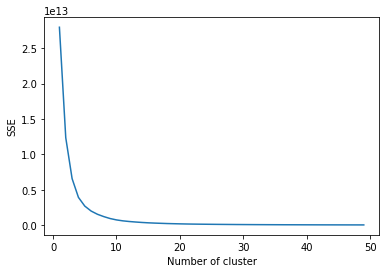

In [13]:
# Clustering Negitive tweets

# Use Elbow method to get the number of clusters
# GAP statistics, computationally expensive, a good alternative

sse = {}
X = [neg_sent_dict[key][0] for key in neg_sent_dict.keys()]
for k in range(1, 50): 
    kmeans = cluster.KMeans(n_clusters=k, max_iter=300 , n_jobs = 6).fit(X)
    labels = kmeans.labels_
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Summary Statistics of Cosine Similairty Distribution CLUSTER 1 --------->

Average Cosine similarity : 0.999847084536
Max Cosine Similarity : 0.999994443391
Min Cosine Similarity : 0.921883337431
Standard Deviation of the Cosine similarity Distribution : 0.00116427998548


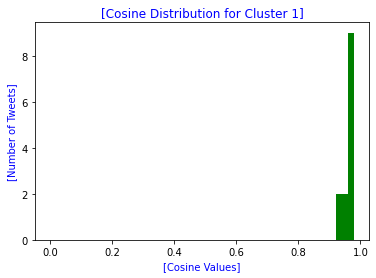

Summary Statistics of Cosine Similairty Distribution CLUSTER 2 --------->

Average Cosine similarity : 0.999990531858
Max Cosine Similarity : 0.999997874155
Min Cosine Similarity : 0.999822459918
Standard Deviation of the Cosine similarity Distribution : 1.69516187117e-05


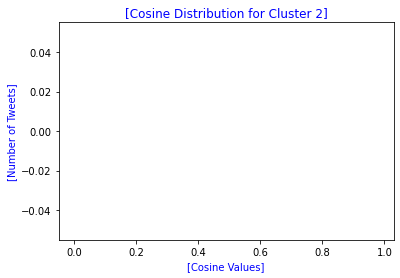

Summary Statistics of Cosine Similairty Distribution CLUSTER 3 --------->

Average Cosine similarity : 0.999989873203
Max Cosine Similarity : 0.999997836088
Min Cosine Similarity : 0.999796803816
Standard Deviation of the Cosine similarity Distribution : 1.76142057791e-05


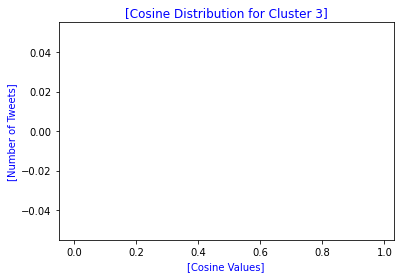

Summary Statistics of Cosine Similairty Distribution CLUSTER 4 --------->

Average Cosine similarity : 0.999993376755
Max Cosine Similarity : 0.999998469785
Min Cosine Similarity : 0.999912498868
Standard Deviation of the Cosine similarity Distribution : 1.32564595213e-05


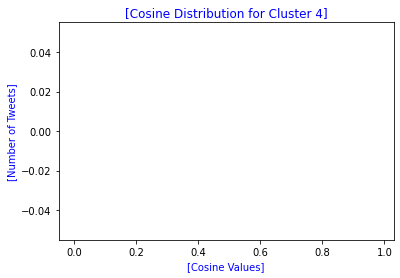

Summary Statistics of Cosine Similairty Distribution CLUSTER 5 --------->

Average Cosine similarity : 0.999996473382
Max Cosine Similarity : 0.999999409596
Min Cosine Similarity : 0.999934855244
Standard Deviation of the Cosine similarity Distribution : 9.97558255797e-06


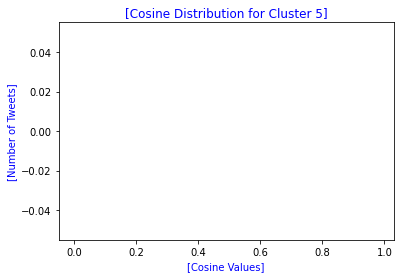

Summary Statistics of Cosine Similairty Distribution CLUSTER 6 --------->

Average Cosine similarity : 0.999984123951
Max Cosine Similarity : 0.999997371368
Min Cosine Similarity : 0.999553080049
Standard Deviation of the Cosine similarity Distribution : 2.67134864968e-05


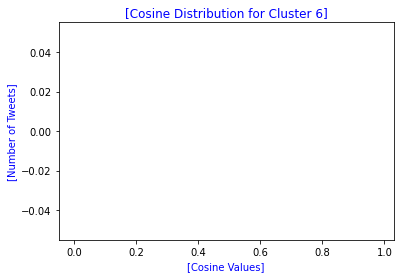

In [15]:
NUM_CLUSTERS = 6
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit([neg_sent_dict[key][0] for key in neg_sent_dict.keys()])
labels = kmeans.labels_

# group_dict -> {"0":{"id1": vector, ...,  "id2": vector}}
neg_group_dict = {}
# group each of the sentence vectors into groups
label_track = []

for label, sent_key in zip(labels, [key for key in neg_sent_dict.keys()]):
    if len(label_track) == 0:
        label_track.append(label)
        neg_group_dict[f"{label}"] = {}
        neg_group_dict[f"{label}"][sent_key] = neg_sent_dict[sent_key]
    else:
        if label not in label_track:
            label_track.append(label)
            neg_group_dict[f"{label}"] = {}
            neg_group_dict[f"{label}"][sent_key] = neg_sent_dict[sent_key]
        else:
            neg_group_dict[f"{label}"][sent_key] = neg_sent_dict[sent_key]

# Average sentence vector for each cluster
# For each cluster define a list of cosine similarities w.r.t to the mean sentence vector
# Cluster summaries
neg_avg_vec_dict = {}
neg_cosine_dict = {}

for label in set(labels):
    sum_vec = np.zeros(300)
    for key in neg_group_dict[f"{label}"].keys():
        sum_vec = sum_vec + neg_group_dict[f"{label}"][key][0]
    
    neg_avg_vec_dict[f"{label}"] = np.divide(sum_vec, len(list(neg_group_dict[f"{label}"].keys())))
    
    neg_cosine_dict[f"{label}"] = [cosine_function(neg_avg_vec_dict[f"{label}"], neg_group_dict[f"{label}"][key][0]) for key in neg_group_dict[f"{label}"].keys()]

    cluster_summary(neg_cosine_dict[f"{label}"], label+1)

###  Determine cluster's 99th percentile cosine similarity, 1% closest vectors to the center of the cluster.

### Low values shows, a lot of noise in the cluster and the cluster cannot be generalized to a concept.

### High value suggest, a region of vector subspace where most of these vectors are to be found and there a high probability of generalizing the cluster to a concept.

In [19]:
percentile = 99
for label in set(labels):
    cosine_val = np.percentile(neg_cosine_dict[f"{label}"], percentile)
    print(f"Cosine Similarity Threshold Cluster {label+1} : {cosine_val}")

Cosine Similarity Threshold Cluster 1 : 0.9999941790095311
Cosine Similarity Threshold Cluster 2 : 0.999997824681458
Cosine Similarity Threshold Cluster 3 : 0.9999977917525481
Cosine Similarity Threshold Cluster 4 : 0.9999984370534727
Cosine Similarity Threshold Cluster 5 : 0.9999994034395785
Cosine Similarity Threshold Cluster 6 : 0.9999971942708892


### Negative Review Candidate Concepts 

In [20]:
threshold = 0.9
list_keys = [key for key in neg_group_dict[f"{label}"].keys()]
concept_list = []

for label in set(labels):
    concept_tweets = []
    list_keys = [key for key in neg_group_dict[f"{label}"].keys()]
    list_cosine_vec=[cos_val for cos_val in neg_cosine_dict[f"{label}"]]
    for key, cos_vec in zip(list_keys, list_cosine_vec):
        if cos_vec >= threshold:
            concept_tweets.append(neg_group_dict[f"{label}"][key][1])
    concept_list.append(concept_tweets)

for idx, label in enumerate(set(labels)):
    print(f"Concept tweets for cluster {label + 1} : ")
    print()
    print(concept_list[idx][0:10])
    print() 

Concept tweets for cluster 1 : 

['i keep getting this error message saying the item can t be played and how to fix it ...', 'still problems with world series so much for the fix', 'we can definitely take a look send us a with your email address so we can follow up', 'fact ba broke the locks when they t need to just makes while thing more disgraceful', 'nope hours later and i still on standby trying not to cry in the airport', 'which station is this alex', 'oh no please reach out to an for options', 'delta yes i need some for a reservation can i pm you the info', 'second day in a row staying home to wait for a package from only to be met with a slip saying i was home', 'that is no fun what device are you watching the show on are other devices having internet trouble in the home']

Concept tweets for cluster 2 : 

['no ..', 'app log-in', 'waiting ...', 'die double-opt-in', 'multi-use trays', 's ..', 'rout .. dist ..', 'pc router', 'bis ab', 'problem es']

Concept tweets for cluster 3 : 